In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ml_insights as mli
import imp

# To Plot matplotlib figures inline on the notebook
%matplotlib inline

In [2]:
imp.reload(mli)

<module 'ml_insights' from '/Users/brianlucena/Work/Git/numeristical/introspective/ml_insights/__init__.py'>

In [3]:
datafile = "data/cal_housing_data.csv"

In [4]:
df=pd.read_csv(datafile)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
longitude           20640 non-null float64
latitude            20640 non-null float64
housingMedianAge    20640 non-null float64
totalRooms          20640 non-null float64
totalBedrooms       20640 non-null float64
population          20640 non-null float64
households          20640 non-null float64
medianIncome        20640 non-null float64
medianHouseValue    20640 non-null float64
dtypes: float64(9)
memory usage: 1.4 MB


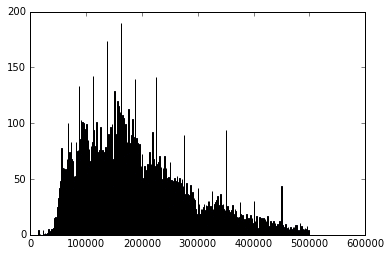

In [6]:
df = df[df['medianHouseValue']<500000]

X=df.loc[:,'longitude':'medianIncome']
y=df['medianHouseValue']
X
plt.hist(df.medianHouseValue,range=[0,600000],bins=600);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19648 entries, 0 to 20639
Data columns (total 9 columns):
longitude           19648 non-null float64
latitude            19648 non-null float64
housingMedianAge    19648 non-null float64
totalRooms          19648 non-null float64
totalBedrooms       19648 non-null float64
population          19648 non-null float64
households          19648 non-null float64
medianIncome        19648 non-null float64
medianHouseValue    19648 non-null float64
dtypes: float64(9)
memory usage: 1.5 MB


In [8]:
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [10]:
gbmodel1 = GradientBoostingRegressor(n_estimators = 1000, 
                                     learning_rate = .01,
                                    max_depth = 7)
gbmodel1.fit(X_train,y_train)
pred_vals_gb1 = gbmodel1.predict(X_test)

In [11]:
pts_to_graph = np.random.choice(X_train.shape[0],500,replace=False)
pts_to_graph;

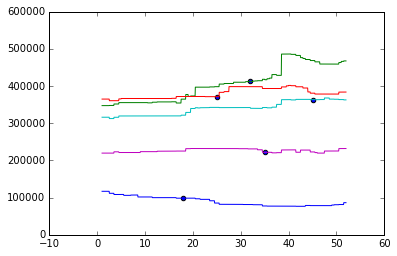

In [13]:
mli.dependence_plot(gbmodel1,X_train,column_num=2, resolution=1000)

In [26]:
pts_to_graph = np.random.choice(X_train.shape[0],500,replace=False)
pts_to_graph;

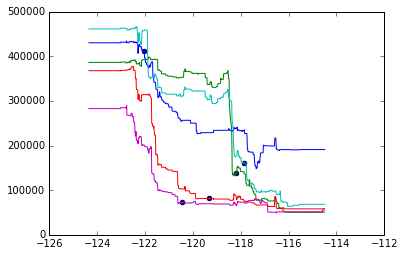

In [54]:
black_box_visualize(gbmodel2,X_train,column_num=0, resolution=1000)

In [ ]:
50=='yes'

In [ ]:
np.random.seed(42)

In [ ]:
def variable_effect_plot(model, dataset, column_num, pts_selected='sample', num_pts=100, col_values='auto',
                       resolution = 100, **kwargs):

    ## Convert Pandas DataFrame to nparray explicitly to make life easier
    if type(dataset)==pd.DataFrame:
        dataset = dataset.values

    ## Determine which points to serve as base points depending on pts_selected and num_pts    
    if ((type(pts_selected) == str) and (pts_selected=='sample')):
        pts_chosen = np.random.choice(dataset.shape[0],min(dataset.shape[0],num_pts),replace=False)
    elif ((type(pts_selected) == str) and (pts_selected=='first')):
        pts_chosen = np.array(range(np.min(dataset.shape[0],num_pts)))
    else:
        pts_chosen = np.array(pts_selected)
    
    ## Determine the range of values to plot for the chosen column
    if (type(col_values)==str and col_values=='auto'):
        values_to_plot = np.linspace(np.min(dataset[:,column_num]),np.max(dataset[:,column_num]),resolution)
    else:
        values_to_plot = np.array(col_values)    
   
    ## Create the 2d array for differences by values
    values_xvec = (values_to_plot[1:]+values_to_plot[:-1])/2
    pred_vals_diff = np.zeros((len(pts_chosen),len(values_xvec)))
    pred_vals = np.zeros((len(pts_chosen),len(values_to_plot)))

    
    for i,row in enumerate(dataset[pts_chosen,:]):
        y_pred, values = gen_model_pred(model, row, column_num, values_to_plot)
        diffvec = np.diff(y_pred)
        #plt.scatter(values_xvec,diffvec,**kwargs)
        pred_vals_diff[i,:]=diffvec
        pred_vals[i,:]=y_pred
    
    median_diff_vec = np.zeros(len(values_xvec))
    median_val_vec = np.zeros(len(values_to_plot))

    for j in range(len(values_to_plot)):
        median_val_vec[j] = np.median(pred_vals[:,j])
    for j in range(len(values_xvec)):
        median_diff_vec[j] = np.median(pred_vals_diff[:,j])
    #plt.plot(values_xvec,np.cumsum(median_diff_vec),c='k',marker='_')
    plt.plot(values_to_plot,(median_val_vec),c='k')


    
    for j in range((pred_vals_diff.shape[0])):
        plt.scatter(values_xvec,pred_vals_diff[j,:]+median_val_vec[1:]-median_diff_vec,**kwargs)

    return pred_vals,pred_vals_diff

In [ ]:
a,b = variable_effect_plot(gbmodel1,X_train,column_num=0,pts_selected = pts_to_graph,alpha=.5,marker='_', resolution=30)

In [ ]:
np.concatenate((a,b), axis=1).shape

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
km_model = KMeans(n_clusters=6)

In [ ]:
#cluster_num = km_model.fit_predict(np.concatenate((a,b), axis=1))
cluster_num = km_model.fit_predict(b)

In [ ]:
black_box_visualize(gbmodel2,X_train,column_num=0,pts_selected=pts_to_graph,alpha=1,marker='x',
                    c='k')

In [ ]:
black_box_visualize(gbmodel2,X_train,column_num=0,pts_selected=pts_to_graph[cluster_num==0],alpha=1,marker='x',
                    c='k')

In [ ]:
black_box_visualize(gbmodel2,X_train,column_num=0,pts_selected=pts_to_graph[cluster_num==1],alpha=1,marker='x',
                    c='k')

In [ ]:
black_box_visualize(gbmodel2,X_train,column_num=0,pts_selected=pts_to_graph[cluster_num==2],alpha=1,marker='x',
                    c='k')

In [ ]:
black_box_visualize(gbmodel2,X_train,column_num=0,pts_selected=pts_to_graph[cluster_num==3],alpha=.01,marker='x',
                    c='k')

In [ ]:
black_box_visualize(gbmodel2,X_train,column_num=0,pts_selected=pts_to_graph[cluster_num==4],alpha=.01,marker='x',
                    c='k')

In [ ]:
black_box_visualize(gbmodel2,X_train,column_num=0,pts_selected=pts_to_graph[cluster_num==5],alpha=.01,marker='x',
                    c='k')

In [ ]:
black_box_visualize(gbmodel2,X_train,column_num=0,pts_selected=pts_to_graph[cluster_num==6],alpha=.01,marker='x',
                    c='k')

In [ ]:
black_box_visualize(gbmodel2,X_train,column_num=0,pts_selected=pts_to_graph[cluster_num==7],alpha=.01,marker='x',
                    c='k')

In [ ]:
black_box_visualize(gbmodel2,X_train,column_num=0,pts_selected=pts_to_graph[cluster_num==8],alpha=.01,marker='x',
                    c='k')

In [ ]:
black_box_visualize(gbmodel2,X_train,column_num=0,pts_selected=pts_to_graph[cluster_num==9],alpha=.01,marker='x',
                    c='k')

In [ ]:
black_box_visualize(gbmodel2,X_train,column_num=0,pts_selected=pts_to_graph[cluster_num==10],alpha=.01,marker='x',
                    c='k')

In [ ]:
black_box_visualize(gbmodel2,X_train,column_num=0,pts_selected=pts_to_graph[cluster_num==11],alpha=.01,marker='x',
                    c='k')

In [ ]:
plt.hist(X_train.iloc[pts_to_graph[cluster_num==0],:].longitude, bins=100, range=(-125,-115));

In [ ]:
plt.hist(X_train.iloc[pts_to_graph[cluster_num==1],:].longitude, bins=100, range=(-125,-115));

In [ ]:
plt.hist(X_train.iloc[pts_to_graph[cluster_num==2],:].longitude, bins=100, range=(-125,-115));

In [ ]:
plt.hist(X_train.iloc[pts_to_graph[cluster_num==3],:].longitude, bins=100, range=(-125,-115));

In [ ]:
plt.hist(X_train.iloc[pts_to_graph[cluster_num==4],:].longitude, bins=100, range=(-125,-115));

In [ ]:
plt.hist(X_train.iloc[pts_to_graph[cluster_num==5],:].longitude, bins=100, range=(-125,-115));

In [ ]:
np.argmax(df.columns=='households')

In [49]:
np.random.choice(range(1,7), size=6, replace=False)

array([2, 5, 3, 1, 6, 4])